# <font color='red'>Install Dependencies<font>

In [1]:
!pip install diffusers accelerate

  Obtaining dependency information for diffusers from https://files.pythonhosted.org/packages/dc/92/b17949ff6b634bfb93e12ff8753288d6c59edf4366cc5c501377e6373e0c/diffusers-0.24.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.5 MB/s eta 0:00:00:00:010:01


# <font color='red'>Create pipeline<font>

In [2]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16).to("cuda")
pipeline.load_lora_weights("/kaggle/input/loraaa/shogun.safetensors", weight_name="shoden.safetensors")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


# <font color='red'>1 image per prompt<font>

Token indices sequence length is longer than the specified maximum sequence length for this model (85 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [': 1. 1 ), hand on lips']


  0%|          | 0/50 [00:00<?, ?it/s]

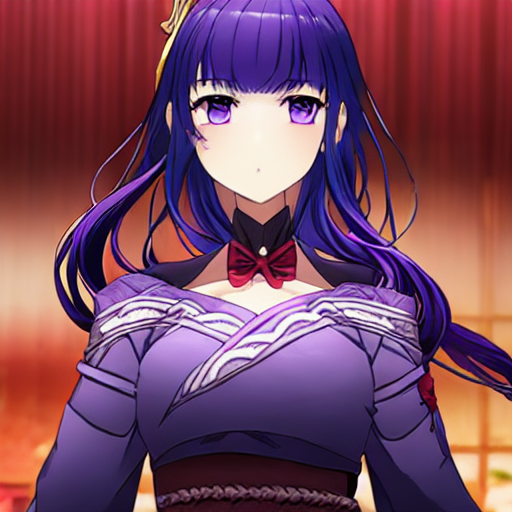

In [3]:
prompt="1girl, blunt bangs, braid, wide sleeves, hair ornament, japanese clothes, red obi, (purple hair:1.2), very long hair, straight hair, looking at viewer, highly detailed background, (photo realistic:1.2), detailed eyes, red eyeshadow, depth of field, symmetry eyes, (solo:1.2),(cyberpunk city:1.1), hand on lips"
negative_prompt = "(watermarks:1.2), username, paintings, sketches, (worst quality:2), (low quality:2), (normal quality:2), monochrome, grayscale, easynegative, low-res, poorly drawn face"
image = pipeline(prompt, negative_prompt=negative_prompt).images[0]
image

# <font color='red'>5 images per prompt<font>

In [4]:
image = pipeline(prompt, negative_prompt=negative_prompt, num_images_per_prompt=5, output_type="np").images
image.shape

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [': 1. 1 ), hand on lips']


  0%|          | 0/50 [00:00<?, ?it/s]

(5, 512, 512, 3)

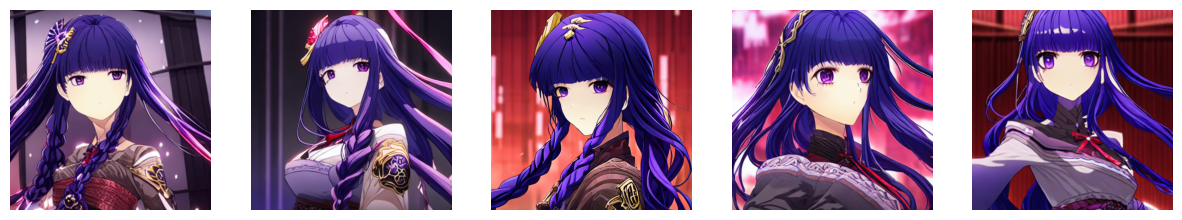

In [5]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15, 15))
for i in range(len(image)):
  plt.subplot(1, len(image), i+1)
  plt.imshow(image[i])
  plt.axis("off")
plt.show()